# <span style = "color:purple;">Linear Regression with Numpy and Pandas</span>

### <span style = "color:red;">**TASK**</span> - To predict the score if the student spends 9.25 hours in studying

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("dark_background")

### 2. Importing data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

The data has 2 Columns anad 25 rows

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values in the dataset

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


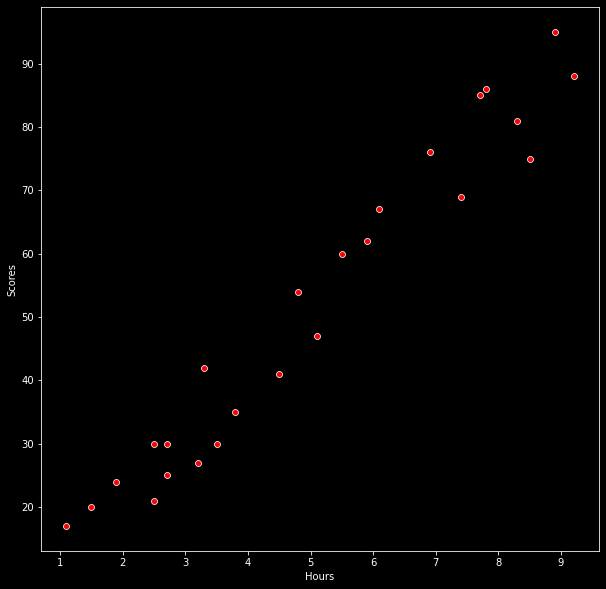

In [7]:
plt.figure(figsize = (10,10))
_ = sns.scatterplot(x = 'Hours', y = "Scores", data = data, color = 'red')

There is a postive linear distribution between the number of hours the student studied and their respective scores in percentage. Hence the **independent variable** from this dataset is <span style = "color : red;">Hours</span> while the **dependent variable** is <span style = "color:blue;">Scores</span>


### 3. Preparing the data

In [8]:
X = np.array(data.iloc[:,:-1].values)
y = data.iloc[:,1].values


### 4. Training the model with the <span style = "color:dark Orange;">Gradient Descent algorithm</span>

In [9]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return (1/(2*m))*np.sum(error)

In [10]:
m = data.shape[0]
X = np.append(np.ones((m,1)),X.reshape(m,1),axis = 1)
y = y.reshape(m,1)
theta = np.zeros((2,1))

In [11]:
cost_function(X,y,theta)

1632.02

In [12]:
def gradient_descent(X,y,theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [13]:
theta, costs = gradient_descent(X,y,theta, alpha = 0.01, iterations = 10000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = 2.48 + 9.78x1


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

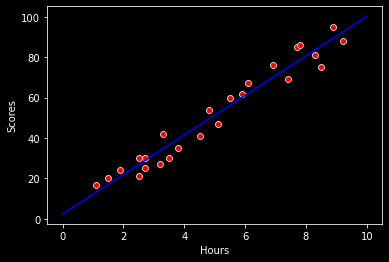

In [15]:
theta = np.squeeze(theta)
x_values = [x for x in range(0,11)]
y_values = [x*theta[1] + theta[0] for x in x_values]
sns.scatterplot(x='Hours', y = 'Scores', data = data, color = 'red')
sns.lineplot(x_values,y_values,color = 'blue')

### Predictions

In [ ]:
def predict(X,theta):
    y_pred = X.dot(theta)
    return y_pred

In [ ]:
y_pred = predict(np.array([1,9.25]),theta)
print("If a student studies for 9.25 hours then the approximate score will be {}%". format(str(round(y_pred))))